# Import

### Import das bibliotecas criadas para resolver os problemas propostos.  

#### Como para acesso ao bucket da AWS atraves da API e necessario uma key favor preencher com a chave e a chave secreta se for fazer algum teste.

Pensando na forma de coleta eu vi varias maneiras possiveis, download direto, utilizar diretamente do bucket com boto3, fazer o carregamento num banco de dados criado na AWS.

Download direto pareceu uma opção bem ruim devido ao fato de serem mais de 2 gigas de dados nos arquivos de json, ou seja um tratamento junto com a coleta se provaria mais rapido e reduziria o trabalho.O carregamento no banco criado da AWS foi muito lento, imagino que é por causa da velocidade da minha internet. 

Por fim decidi pegar as informações diretamente atravez de um bucket e tratalas antes de salvar localmente em alguns csv pois o volume de dados tratado não era tão grande assim.

In [1]:
from ETL import ETL
from analisys import analysis
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [30, 15]

carregamento = ETL(awsKey=['key','secretKey'])
carregamento.load_database()

### Envio de dados para a classe que contem as analises.
A função recebe o formato dos dados.(So csv no momento)
trips que é um vetor contendo todos os nomes dos csv's que contem as informações das viagens nescessarios para as analises.
payment que é o nome do csv que contem os dados dos tipos de pagamentos.
vendor é um csv que contem os dados dos provedores dos serviços de taxi.

In [2]:
files = os.listdir()
trip = []
rest = {}
for each in files:
    if '.csv' in each:
        if 'trip' in each:
            trip.append(each)
        else:
            rest[each[:-4]] = each
dados = analysis('csv',trips=trip,payment=rest['payment'],vendor=rest['vendor'])

#### Calculo da media das viagens que possuem dois ou menos clientes.

Esse foi um problema bem simples de resolver. A função transforma os csv que contem os dados de viegem em DATAFRAMES e depois disso faz o somatorio e a contagem de todos que possuem o campo passenger_count menor ou igual a 2.

In [3]:
print('A distancia media das viagems é: {} unidades de distancia.'.format(dados.get_average()))

A distancia media das viagems é: 2.6625269962032183 unidades de distancia.


#### Calculo do dinheiro gerado por provedor.

Como os dados se encontram em tabelas diferentes primeiro fiz um merge do tipo inner, depois disso foi so agrupar por nome de vendedor e pegar a soma de cada um. 

,name,total_amount
0,"Creative Mobile Technologies, LLC",19549084.28
1,"Dependable Driver Service, Inc",2714901.72
2,Total Solutions Co,45.60
3,VeriFone Inc,19043434.00


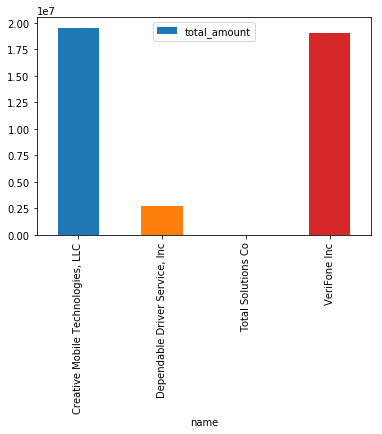

In [4]:
aux = dados.get_vendors()
aux.plot(kind='bar',x='name',y='total_amount')
aux[['name','total_amount']]

#### Calculo do histograma de ganhos por mes.

Como o tempo estava no formato ISO a conversão foi automatica do string para o tipo tempo, depois disso eu peguei todas as viagens que aconteceram no mes, contanto tanto as que começaram quanto as que terminaram. 

Foram feitos dois histogramas, um para o periodo que foi pegado o taxi e outro para o momento de saida do carro.

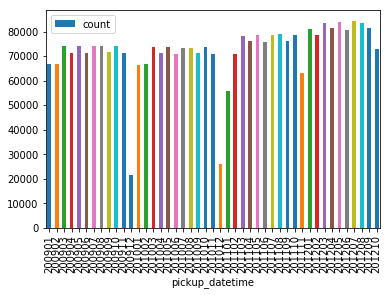

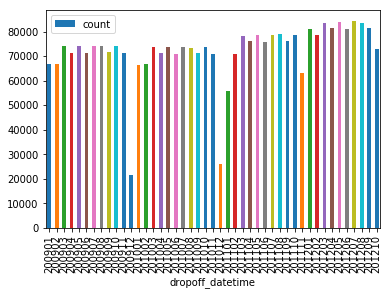

In [5]:
dados.get_cash_histogram()

#### Calculo de gorgetas: 

Estranhamente nesse calculo não houve nenhuma corrida nos meses de dezembro e novembro. 
Então decidi começar por colocar os meses 8,9,10 pois senão seria um exercicio futil, depois
disso coletei todas as corridas daqueles meses e fiz duas series temporais. Uma foi utilizando a
data de entrada no carro a outra foi usando a data de saida do carro.


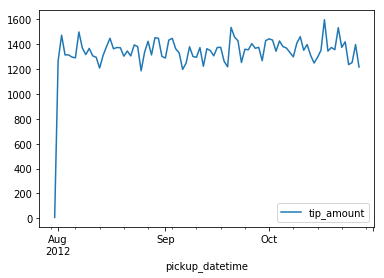

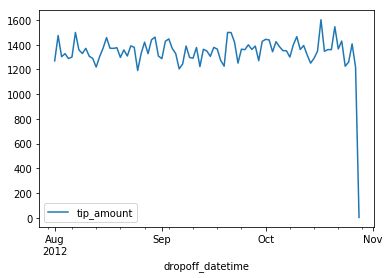

In [6]:
dados.get_tips_series()

#### Calculo das media de tempo nas corridas dos finais de semana.

O calculo foi bem facil, como os finais de semana seguem um padrão bem simples depois de fazer isso eu simplesmente agrupei o tempo e consegui obter a media. 

In [10]:
segundos = dados.get_average_Weekend()
print('O tempo medio de viagems nos finais de semana é {} segundos.'.format(int(round(segundos))))
print('O tempo medio de viagems nos finais de semana é {} minutos.'.format(int(round(segundos/60))))

O tempo medio de viagems nos finais de semana é 524 segundos.
O tempo medio de viagems nos finais de semana é 9 minutos.


#### Mapa de calor baseado na latitude e longitude dos taxis de 2010

Esse mapa foi bem simples de ser criado utilizando apenas da biblioteca gmplot e fazendo 
uma query requisitando o ano de 2010 nos csv.

Os arquivos são criados externamente. Favor checar ambos 'pegadaHeat.html' e 'saidaHeat.html'.

In [11]:
dados.show_start_endpoint()